In [42]:
import numpy as np
import sys
sys.path.append("/home/ljq/code/Ringdown_gap_filling/Proj")
from config.config import Config
from waveform import *
from ringdown_waveform import Gap_dir as Ga
import torch
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from utils.psd import PSD_Lisa_no_Response
from utils.noise import *
from scipy.fftpack import fft, ifft
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import firwin2,welch
from utils.SNR import compute_matched_filter_snr
import os
from utils.noise import *
#计算SNR
snr_tot=0
zoom_factor = 8.5e-2
SNR=20
for i in range(100):

    samp_freq = Config.samp_freq
    freq_ifft = np.arange(Config.f_in, Config.f_out, Config.f_step)
    PSD=psd_interp_func(freq_ifft)

    
    Mtot = np.random.uniform(Config.parameters[0], Config.parameters[1])
    M_ratio = np.random.uniform(Config.parameters[2], Config.parameters[3])
    R_shift = np.random.uniform(Config.parameters[4], Config.parameters[5])
    signal_length = Config.signal_length

    para = [Mtot, M_ratio, R_shift]
    freq_ifft = np.arange(Config.f_in, Config.f_out, Config.f_step)
    f_sf = sf(freq_ifft, para, para_dw, para_dtau)
    st = Ga.Freq_ifft(f_sf)#*Config.zoom_factor
    out_noise, _ = generate_noise_from_psd(len(st),freq_ifft,PSD, sample_rate=samp_freq)
    data=out_noise[0]+st
    
    #计算SNR
    data=zoom_factor*st+out_noise[0]
    _,snr= compute_matched_filter_snr(data[1:signal_length], st[1:signal_length],PSD, samp_freq)
    if abs(snr-SNR)<1:
        data_snr=data[1:signal_length]
        st_snr=st[1:signal_length]
    snr_tot+=snr
snr_tot=snr_tot/100
print(snr_tot)

20.539482165872993


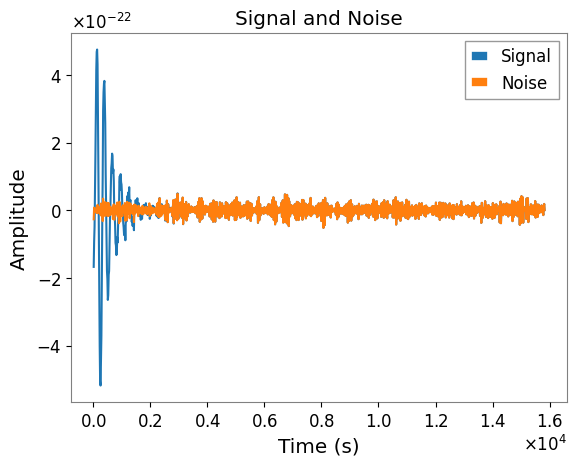

In [45]:
dt = 1.0 / samp_freq  # 采样时间间隔
time_array = np.linspace(0, (len(st) - 1) * dt, len(st))
plt.plot(time_array[1:signal_length], data_snr)
plt.plot(time_array[1:signal_length], data_snr-zoom_factor*st_snr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal and Noise')
plt.legend(['Signal', 'Noise'])
plt.grid()
plt.show()

In [ ]:
import numpy as np
import sys
sys.path.append("/home/ljq/code/Ringdown_gap_filling/Proj")
from config.config import Config
from waveform import *
from ringdown_waveform import Gap_dir as Ga
import torch
from tqdm import tqdm
from multiprocessing import Pool, cpu_count
from utils.psd import PSD_Lisa_no_Response
from utils.noise import *
from scipy.fftpack import fft, ifft
from mpl_toolkits.mplot3d import Axes3D
from scipy.signal import firwin2,welch
from utils.SNR import compute_matched_filter_snr
import os
from utils.noise import *
#计算SNR
snr_tot=0
zoom_factor = 2e-2
SNR=5
for i in range(100):

    samp_freq = Config.samp_freq
    freq_ifft = np.arange(Config.f_in, Config.f_out, Config.f_step)
    PSD=psd_interp_func(freq_ifft)

    
    Mtot = np.random.uniform(Config.parameters[0], Config.parameters[1])
    M_ratio = np.random.uniform(Config.parameters[2], Config.parameters[3])
    R_shift = np.random.uniform(Config.parameters[4], Config.parameters[5])
    signal_length = Config.signal_length

    para = [Mtot, M_ratio, R_shift]
    freq_ifft = np.arange(Config.f_in, Config.f_out, Config.f_step)
    f_sf = sf(freq_ifft, para, para_dw, para_dtau)
    st = Ga.Freq_ifft(f_sf)#*Config.zoom_factor
    out_noise, _ = generate_noise_from_psd(len(st),freq_ifft,PSD, sample_rate=samp_freq)
    data=out_noise[0]+st
    
    #计算SNR
    data=zoom_factor*st+out_noise[0]
    _,snr= compute_matched_filter_snr(data[1:signal_length], st[1:signal_length],PSD, samp_freq)
    if abs(snr-SNR)<1:
        data_snr=data[1:signal_length]
        st_snr=st[1:signal_length]
    snr_tot+=snr
snr_tot=snr_tot/100
print(snr_tot)

4.7639242605103025


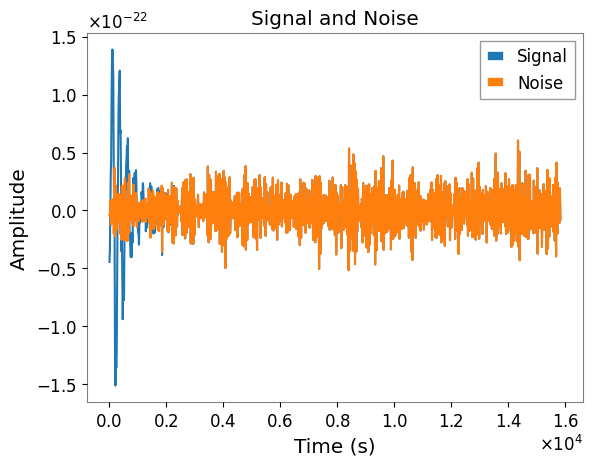

In [49]:
dt = 1.0 / samp_freq  # 采样时间间隔
time_array = np.linspace(0, (len(st) - 1) * dt, len(st))
plt.plot(time_array[1:signal_length], data_snr)
plt.plot(time_array[1:signal_length], data_snr-zoom_factor*st_snr)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal and Noise')
plt.legend(['Signal', 'Noise'])
plt.grid()
plt.show()